### Welcome to my tutorial of training a torch model from scratch

In [1]:
import torch

In [ ]:
# 1. Create Synthetic Data

# We want our model to learn the equation: y = 2x + 0.5
W_true = torch.tensor([[2.0]])
b_true = torch.tensor([[0.5]])

# Create 100 data points, with some random noise
X = torch.randn(100, 1)
y_true = X @ W_true + b_true + 0.1 * torch.randn(100, 1) # Add noise

print(f"--- Data Created. Goal: Learn W=2.0 and b=0.5 ---")

--- Data Created. Goal: Learn W=2.0 and b=0.5 ---


### Visualizing the Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

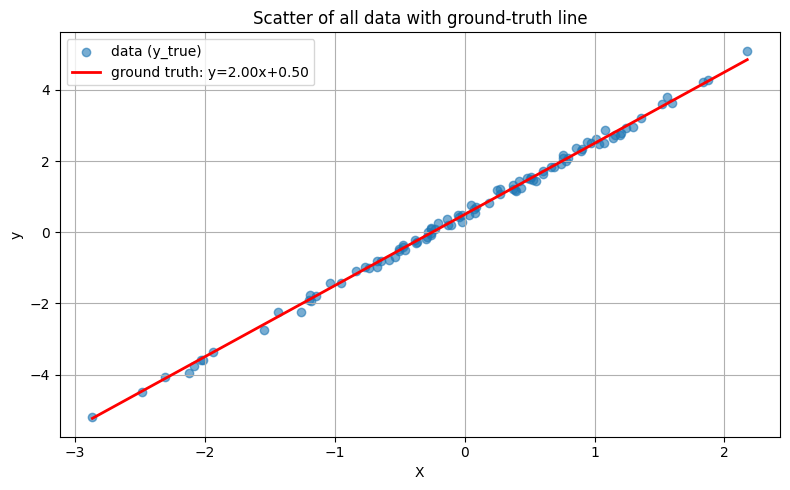

In [4]:

# prepare data (convert tensors to numpy)
x = X.squeeze().numpy()
y = y_true.squeeze().numpy()

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, label='data (y_true)')

# plot ground-truth line y = W_true * x + b_true
xs = np.linspace(x.min(), x.max(), 200)
ys = W_true.item() * xs + b_true.item()
plt.plot(xs, ys, color='red', lw=2, label=f"ground truth: y={W_true.item():.2f}x+{b_true.item():.2f}")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter of all data with ground-truth line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- This is the code from your image ---

# Hyperparameters
learning_rate, epochs = 0.01, 100

# Re-initialize parameters (These are what we will "learn")
# We use randn() to start them at random values
W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

print(f"Initial W: {W.item():.3f}, Initial b: {b.item():.3f}\n")

# Training Loop
for epoch in range(epochs):
    # Forward pass and loss
    # y_hat is our model's prediction
    y_hat = X @ W + b
    
    # Calculate loss (Mean Squared Error)
    loss = torch.mean((y_hat - y_true)**2)

    # Backward pass
    # PyTorch automatically calculates the gradients (derivatives)
    # of the loss with respect to all tensors that have requires_grad=True (i.e., W and b)
    loss.backward()

    # Update parameters
    # We wrap this in torch.no_grad() because we are manually
    # changing the parameters. We don't want this operation
    # to be tracked for the next gradient calculation.
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    # Zero gradients
    # We must reset the gradients after each update.
    # If we don't, they will accumulate on every loop.
    W.grad.zero_()
    b.grad.zero_()

    # --- End of your image's code ---

    # Optional: Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3}/{epochs} | Loss: {loss.item():.4f} | W: {W.item():.3f} | b: {b.item():.3f}")

print("\n--- Training Finished ---")
print(f"Original W: {W_true.item():.3f} | Learned W: {W.item():.3f}")
print(f"Original b: {b_true.item():.3f} | Learned b: {b.item():.3f}")